In [1]:
from keras.applications.resnet import ResNet50, preprocess_input
from keras.preprocessing import image
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Data directories
train_dir = '/content/drive/MyDrive/A/Train'
test_dir = '/content/drive/MyDrive/A/Test'

In [4]:
# Load ResNet model for feature extraction
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))



94765736/94765736 [==============================] - 1s 0us/step


In [5]:
# Load ResNet model for feature extraction
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [6]:
# Function to extract features from an image using ResNet
def extract_features_resnet(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    features = model.predict(img_data)
    return features

In [17]:
# Load images and extract features for training
x_train, y_train = [], []
for i in range(5):
    class_dir = os.path.join(train_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features_resnet(os.path.join(class_dir, img_path))
        x_train.append(features.flatten())
        y_train.append(i)

1/1 [==============================] - 0s 200ms/step


In [19]:
# Load images and extract features for testing
x_test, y_test = [], []
for i in range(5):
    class_dir = os.path.join(test_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features_resnet(os.path.join(class_dir, img_path))
        x_test.append(features.flatten())
        y_test.append(i)

1/1 [==============================] - 0s 229ms/step


In [15]:
import torch

# Load the model using torch.load
model_classification = torch.load('/content/drive/MyDrive/NewModel.h5')

# Function to classify features using NewModel.h5
def classify_features(features):
    # Convert features to torch tensor
    features_tensor = torch.tensor(features)

    # Set the model to evaluation mode
    model_classification.eval()

    # Forward pass
    with torch.no_grad():
        predictions = model_classification(features_tensor)

    # Get the predicted classes
    _, predicted_classes = torch.max(predictions, 1)

    return predicted_classes.numpy()


In [20]:
from sklearn.tree import DecisionTreeClassifier

# Define hyperparameters
max_depth = 10
min_samples_split = 2
min_samples_leaf = 1
max_features = None  # Set to None for auto
criterion = 'gini'
splitter = 'best'

# Create and train the Decision Tree classifier with adjusted hyperparameters
clf = DecisionTreeClassifier(
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    max_features=max_features,
    criterion=criterion,
    splitter=splitter
)
clf.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=10)

# Predict on test set
y_pred = clf.predict(x_test)


# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[27 19  6  4  4]
 [11 27 14  3  5]
 [12 13 27  1  7]
 [ 6  2  5 41  6]
 [ 5  3  6 16 30]]


Training Decision Tree with linear kernel...
Training Decision Tree with poly kernel...
Training Decision Tree with rbf kernel...
Training Decision Tree with sigmoid kernel...
Training Decision Tree with polynomial_exponential kernel...



Accuracy: 0.5066666666666667
Precision: 0.507541499978258
Recall: 0.5066666666666667
F1 Score: 0.5062212534123265


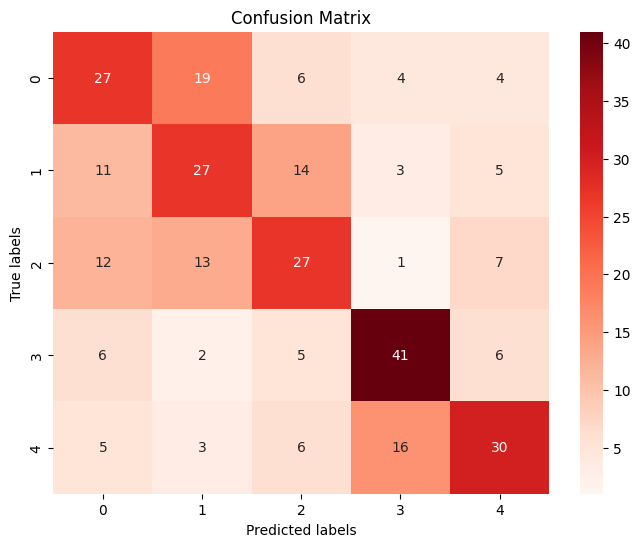

In [21]:
# Performance metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Reds', fmt='g', xticklabels=[str(i) for i in range(5)], yticklabels=[str(i) for i in range(5)])
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()
